In [1]:
import stata_setup
stata_setup.config('C:\Program Files\Stata17/', 'se')

import pandas as pd
import io
import requests
import pystata.stata
import stata_setup
import numpy as np
import os 
from IPython.display import Image
import seaborn as sb
import matplotlib.pyplot as plt


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 24 Aug 2022
Serial number: 401709313030
  Licensed to: Adam Heisey
               Marquette University

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


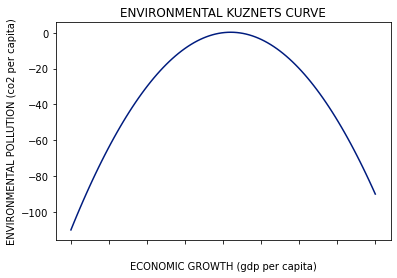

In [2]:
# create 100 equally spaced points between -10 and 10
x = np.linspace(-10, 10, 100)

# Basic theoretical relationship--inverse U
y = x - x**2 

with plt.style.context('seaborn-dark-palette'):
    plt.plot(x, y)
    plt.xlabel("ECONOMIC GROWTH (gdp per capita)")
    plt.xticks(color='w')
    plt.ylabel("ENVIRONMENTAL POLLUTION (co2 per capita)")
    plt.title("ENVIRONMENTAL KUZNETS CURVE")
    #plt.show()
plt.savefig('Environmental Kuznets Curve',bbox_inches='tight', dpi=150)

In [3]:
%%stata

cd "C:\Users\adamh\OneDrive - Marquette University\Macro Theory\Project\Income Inequality\Co2\TOP 6 Data"


. 
. cd "C:\Users\adamh\OneDrive - Marquette University\Macro Theory\Project\Incom
> e Inequality\Co2\TOP 6 Data"
C:\Users\adamh\OneDrive - Marquette University\Macro Theory\Project\Income Ineq
> uality\Co2\TOP 6 Data

. 


In [50]:
%%stata

use DATAEM_final1.dta, clear




. 
. use DATAEM_final1.dta, clear

. 
. 


In [34]:
df= pd.read_stata('DATAEM_final1.dta')
print(df['lngppk_'].max())
df

11.008281707763672


,ID,year,lnkwk_,lngppk_,lnemk_,gini_emmk6_,recess_,lngdppk2_,resid,gdp
0,1.0,1980-01-01,9.129327,10.347416,3.041745,0.32184,0.0,107.069016,2.565574,31176.376953
1,1.0,1981-01-01,9.144093,10.362414,3.006206,0.32687,0.0,107.379631,2.570697,31647.498047
2,1.0,1982-01-01,9.105922,10.334712,2.945319,0.32628,1.0,106.806274,2.542536,30782.820312
3,1.0,1983-01-01,9.127252,10.370410,2.931533,0.32106,0.0,107.545403,2.549175,31901.552734
4,1.0,1984-01-01,9.179305,10.431527,2.973683,0.31330,0.0,108.816757,2.561795,33912.097656
...,...,...,...,...,...,...,...,...,...,...
235,6.0,2015-01-01,8.820590,10.617564,1.650186,0.23456,0.0,112.732666,2.090484,40846.000000
236,6.0,2016-01-01,8.833145,10.625146,1.656729,0.23299,0.0,112.893723,2.097857,41156.859375
237,6.0,2017-01-01,8.824682,10.646288,1.670960,0.23726,0.0,113.343445,2.075739,42036.261719
238,6.0,2018-01-01,8.810412,10.661903,1.628259,0.24447,0.0,113.676186,2.051506,42697.832031



. 
. xtset ID year, yearly

Panel variable: ID (strongly balanced)
 Time variable: year, 1980 to 2019
         Delta: 1 year

. 
. *xtreg lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_ , fe 
. 
. *lngdppk2_ 
. 
. *c.lngppk_##c.lngppk_
. 
. *corrects for het and serial correlation:
. * vce(cluster ID)
. 
. *xtgls lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_, igls panels(heteroskedastic)
. 
. *xtgls lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_, vce(cluster ID)
. 
. *estat ic
. 
. *estat hettest, rhs
. 
. *joint hyp f- test null lnkwk = 0, etc. 
. *test (lnkwk_ lngppk_ lngdppk2_ recess_)
. 
. *estat ovtest
. 
. *predict resid, xb
. 
. *generate gdp = exp(lngppk_)
. 
. *save DATAEM_final1.dta, replace
. 
. xtreg lnemk_ lnkwk_ lngppk_ c.lngppk_#c.lngppk_ recess_ , fe 

Fixed-effects (within) regression               Number of obs     =        240
Group variable: ID                              Number of groups  =          6

R-squared:                                      Obs per group:
     Within  = 0.85

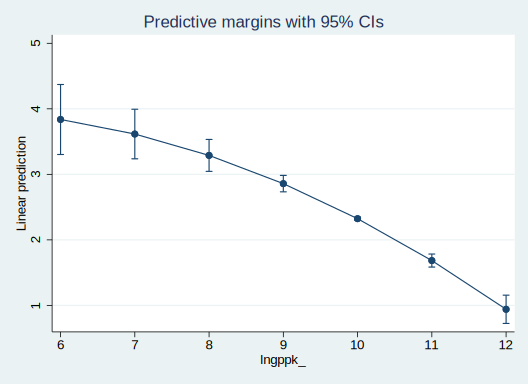

In [51]:
%%stata

xtset ID year, yearly

*xtreg lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_ , fe 

*lngdppk2_ 

*c.lngppk_##c.lngppk_

*corrects for het and serial correlation:
* vce(cluster ID)

*xtgls lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_, igls panels(heteroskedastic)

*xtgls lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_, vce(cluster ID)

*estat ic

*estat hettest, rhs

*joint hyp f- test null lnkwk = 0, etc. 
*test (lnkwk_ lngppk_ lngdppk2_ recess_)

*estat ovtest

*predict resid, xb

*generate gdp = exp(lngppk_)

*save DATAEM_final1.dta, replace

xtreg lnemk_ lnkwk_ lngppk_ c.lngppk_#c.lngppk_ recess_ , fe 
margins, predict(xb) at(lngppk_ = (6(1.0)12))
marginsplot

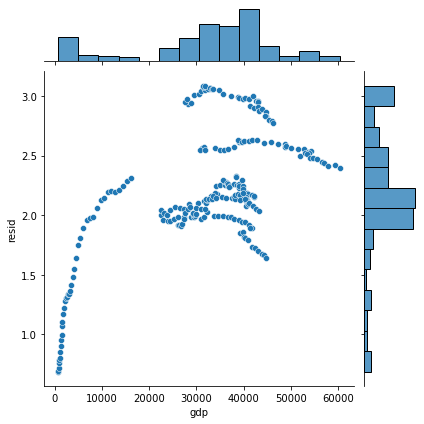

In [36]:
df = pd.read_stata('DATAEM_final1.dta')
df
sb.jointplot(x='gdp', y='resid', data=df)

#### You do not have to input any extra commands into Stata. Stata automatically conducts this test for you in the original regression output. The F-stat associated with this test is found in the table in the upper right-hand corner of the regression output. Here, the F-stat is approximately 308. The p-value with this test is right below the test statistic. Here, the p-value is essentially zero. Again, we would reject the null hypothesis and conclude that the three variables are statistically significantly related to real earnings at the 1% level.

#### Panel:
- you should first classify your panel dataset as a large N, small T one (as it would seem) or the other way round;
- if you're dealing with a large N, small T dataset, go -xtreg- (not -xtgls, which is devised for small N, large T datasets);
- if you suspect heteroskedasticity and/or autocorrelation with your data, you should robustifying/clustering your standard errors (SEs). Unlike with -regress-, those options do the same job under -xtreg-;
- if you impose cluster robus SEs (as per above), the -hausman- test should be replaced by the user-written programme -xtoverid- (type -search xtoverid- from within Stata to spot it).

In [8]:
%%stata

xtunitroot fisher lnemk_, dfuller lags(0)


. 
. xtunitroot fisher lnemk_, dfuller lags(0)

Fisher-type unit-root test for lnemk_
Based on augmented Dickey–Fuller tests
--------------------------------------
H0: All panels contain unit roots           Number of panels  =      6
Ha: At least one panel is stationary        Number of periods =     40

AR parameter: Panel-specific                Asymptotics: T -> Infinity
Panel means:  Included
Time trend:   Not included
Drift term:   Not included                  ADF regressions: 0 lags
------------------------------------------------------------------------------
                                  Statistic      p-value
------------------------------------------------------------------------------
 Inverse chi-squared(12)   P         8.1532       0.7730
 Inverse normal            Z         1.9964       0.9771
 Inverse logit t(34)       L*        2.3197       0.9868
 Modified inv. chi-squared Pm       -0.7852       0.7838
------------------------------------------------------------

In [9]:
%%stata
*check for serial autocorrelation
*xtserial 


. *check for serial autocorrelation
. *xtserial 
. 


In [10]:
%%stata

xtunitroot fisher lnkwk_, dfuller lags(0)


. 
. xtunitroot fisher lnkwk_, dfuller lags(0)

Fisher-type unit-root test for lnkwk_
Based on augmented Dickey–Fuller tests
--------------------------------------
H0: All panels contain unit roots           Number of panels  =      6
Ha: At least one panel is stationary        Number of periods =     40

AR parameter: Panel-specific                Asymptotics: T -> Infinity
Panel means:  Included
Time trend:   Not included
Drift term:   Not included                  ADF regressions: 0 lags
------------------------------------------------------------------------------
                                  Statistic      p-value
------------------------------------------------------------------------------
 Inverse chi-squared(12)   P        24.7063       0.0163
 Inverse normal            Z        -1.4294       0.0764
 Inverse logit t(34)       L*       -1.3273       0.0966
 Modified inv. chi-squared Pm        2.5937       0.0047
------------------------------------------------------------

In [11]:
%%stata

xtunitroot fisher lngppk_, dfuller lags(0)


. 
. xtunitroot fisher lngppk_, dfuller lags(0)

Fisher-type unit-root test for lngppk_
Based on augmented Dickey–Fuller tests
--------------------------------------
H0: All panels contain unit roots           Number of panels  =      6
Ha: At least one panel is stationary        Number of periods =     40

AR parameter: Panel-specific                Asymptotics: T -> Infinity
Panel means:  Included
Time trend:   Not included
Drift term:   Not included                  ADF regressions: 0 lags
------------------------------------------------------------------------------
                                  Statistic      p-value
------------------------------------------------------------------------------
 Inverse chi-squared(12)   P        20.9873       0.0506
 Inverse normal            Z        -0.9407       0.1734
 Inverse logit t(34)       L*       -1.2725       0.1059
 Modified inv. chi-squared Pm        1.8345       0.0333
----------------------------------------------------------

In [48]:
%%stata
by ID, sort: xtsum lnkwk_ lngppk_ lnemk_ gini_emmk6_


-------------------------------------------------------------------------------
-> ID = 1

Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
lnkwk_   overall |  9.356085   .1083945   9.105922   9.466529 |     N =      40
         between |                    .   9.356085   9.356085 |     n =       1
         within  |             .1083945   9.105922   9.466529 |     T =      40
                 |                                            |
lngppk_  overall |  10.71836   .2023996   10.33471   11.00828 |     N =      40
         between |                    .   10.71836   10.71836 |     n =       1
         within  |             .2023996   10.33471   11.00828 |     T =      40
                 |                                            |
lnemk_   overall |  2.946463   .0899544   2.746431   3.041745 |     N =      40
         between |                    .   2.946463   2.94646

In [49]:
%%stata
xtsum lnkwk_ lngppk_ lnemk_ gini_emmk6_


Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
lnkwk_   overall |  8.668659   .9498763   5.564486   9.763043 |     N =     240
         between |             .9406363   6.951933   9.648001 |     n =       6
         within  |             .4023051   7.281212   10.19156 |     T =      40
                 |                                            |
lngppk_  overall |  10.11798   .9922644   6.526947   11.00828 |     N =     240
         between |             .9759011   8.137689   10.71836 |     n =       6
         within  |              .433146   8.507239   11.66828 |     T =      40
                 |                                            |
lnemk_   overall |  2.202201   .6325869    .445657   3.041745 |     N =     240
         between |             .6345865   1.212126   2.946463 |     n =       6
         within  |             .2513538   1.435732   3.031854 |     T =

In [39]:
%%stata
by ID, sort: mean(lnkwk_)

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\adamh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Stata17/utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: mean may not be combined with by
r(190);




. 
. xtline lngppk_, overlay

. 


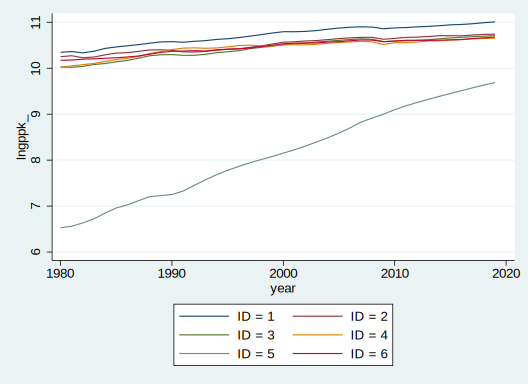

In [13]:
%%stata

xtline lngppk_, overlay


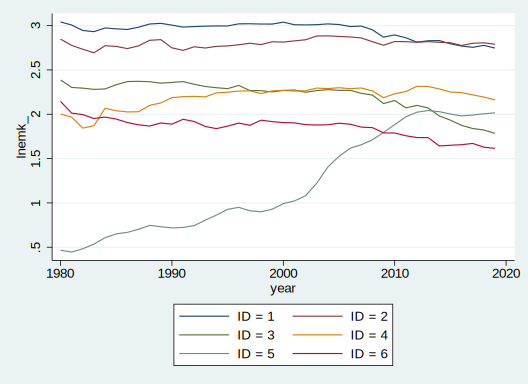

In [14]:
%%stata
xtline lnemk_, overlay

In [15]:
%%stata
twoway (tsline  , recast(connected))

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\adamh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Stata17/utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: varlist required
r(100);



In [16]:
df = pd.read_stata("TOP6data_country.dta")
df.describe

<bound method NDFrame.describe of     date  usa_consump  usa_pop_thousands  usa_gdpbillions  \
0   1980  2094.448975      227119.000000      7080.750000   
1   1981  2147.102783      229416.203125      7260.450195   
2   1982  2086.441406      231608.500000      7129.560059   
3   1983  2150.954590      233731.000000      7456.379883   
4   1984  2285.796387      235784.796875      7995.959961   
5   1985  2323.973877      237880.796875      8329.370117   
6   1986  2368.753174      240072.000000      8617.769531   
7   1987  2457.272217      242235.000000      8915.900391   
8   1988  2578.062500      244446.203125      9288.339844   
9   1989  2755.664551      246765.203125      9629.410156   
10  1990  2837.116943      249516.796875      9811.070312   
11  1991  2886.097412      252831.203125      9800.429688   
12  1992  2897.247559      256391.203125     10145.660156   
13  1993  3000.745117      259809.500000     10424.870117   
14  1994  3080.938477      263017.812500     10844.

In [17]:
%%stata

use TOP6data_country.dta, clear

tsset ntt, yearly


. 
. use TOP6data_country.dta, clear

. 
. tsset ntt, yearly

Time variable: ntt, 1980 to 2019
        Delta: 1 year

. 


In [18]:
df = pd.read_stata('TOP6data_country.dta')
df.describe

<bound method NDFrame.describe of     date  usa_consump  usa_pop_thousands  usa_gdpbillions  \
0   1980  2094.448975      227119.000000      7080.750000   
1   1981  2147.102783      229416.203125      7260.450195   
2   1982  2086.441406      231608.500000      7129.560059   
3   1983  2150.954590      233731.000000      7456.379883   
4   1984  2285.796387      235784.796875      7995.959961   
5   1985  2323.973877      237880.796875      8329.370117   
6   1986  2368.753174      240072.000000      8617.769531   
7   1987  2457.272217      242235.000000      8915.900391   
8   1988  2578.062500      244446.203125      9288.339844   
9   1989  2755.664551      246765.203125      9629.410156   
10  1990  2837.116943      249516.796875      9811.070312   
11  1991  2886.097412      252831.203125      9800.429688   
12  1992  2897.247559      256391.203125     10145.660156   
13  1993  3000.745117      259809.500000     10424.870117   
14  1994  3080.938477      263017.812500     10844.

In [19]:
%%stata
newey lntop6_empk usa_lnkwk usa_lngppk can_lnkwk can_lngppk gbr_lnkwk gbr_lngppk jpn_lnkwk jpn_lngppk chn_lnkwk chn_lngppk fra_lnkwk fra_lngppk , noconstant lag(0)
*newey usa_lnemk usa_lnkwk c.usa_lngppk##c.usa_lngppk, noconstant lag(0)
*margins, predict(xb) at(lngppk_ = (6(1.0)12))

*margins graph
*marginsplot


. newey lntop6_empk usa_lnkwk usa_lngppk can_lnkwk can_lngppk gbr_lnkwk gbr_lng
> ppk jpn_lnkwk jpn_lngppk chn_lnkwk chn_lngppk fra_lnkwk fra_lngppk , noconsta
> nt lag(0)

Regression with Newey–West standard errors      Number of obs     =         40
Maximum lag = 0                                 F( 12,        28) =  885021.71
                                                Prob > F          =     0.0000

------------------------------------------------------------------------------
             |             Newey–West
 lntop6_empk | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   usa_lnkwk |   .2599991   .2655356     0.98   0.336    -.2839259    .8039241
  usa_lngppk |   .2175831   .2683224     0.81   0.424    -.3320503    .7672166
   can_lnkwk |  -.1382769   .1905178    -0.73   0.474     -.528535    .2519811
  can_lngppk |   .6147636   .2590367     2.37   0.025     .0841509    1.1453


. twoway (tsline usa_lnemk) (tsline usa_lngppk, yaxis(2)), title(Co2 Emissions 
> (left) Vs. GDP (right)) subtitle(USA from 1980 to 2019)

. *graph save "Graph" "C:\Users\adamh\OneDrive - Marquette University\Time-Seri
> es Econometrics\Mod 6\j.gph"
. 


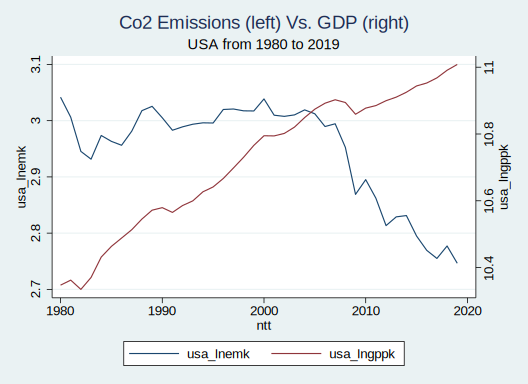

In [20]:
%%stata
twoway (tsline usa_lnemk) (tsline usa_lngppk, yaxis(2)), title(Co2 Emissions (left) Vs. GDP (right)) subtitle(USA from 1980 to 2019)
*graph save "Graph" "C:\Users\adamh\OneDrive - Marquette University\Time-Series Econometrics\Mod 6\j.gph"


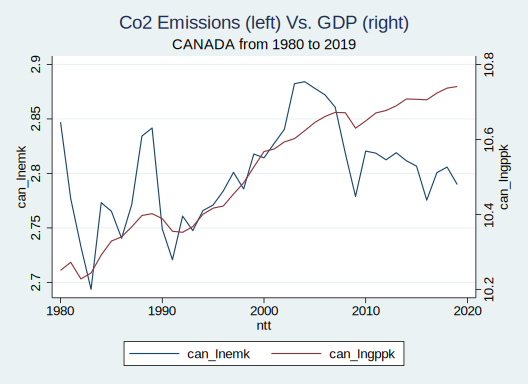

In [21]:
%%stata
twoway (tsline can_lnemk) (tsline can_lngppk, yaxis(2)), title(Co2 Emissions (left) Vs. GDP (right)) subtitle(CANADA from 1980 to 2019) 

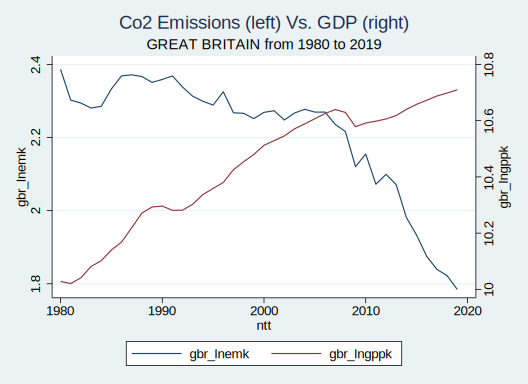

In [22]:
%%stata
twoway (tsline gbr_lnemk) (tsline gbr_lngppk, yaxis(2)), title(Co2 Emissions (left) Vs. GDP (right)) subtitle(GREAT BRITAIN from 1980 to 2019) 

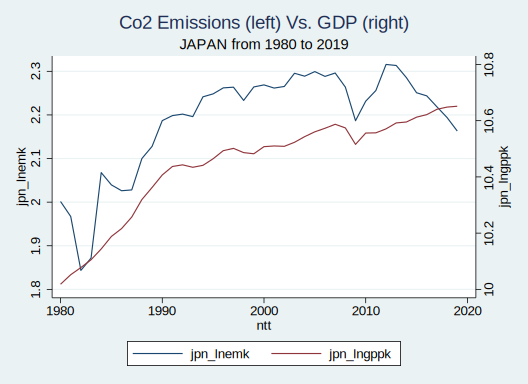

In [23]:
%%stata
twoway (tsline jpn_lnemk) (tsline jpn_lngppk, yaxis(2)), title(Co2 Emissions (left) Vs. GDP (right)) subtitle(JAPAN from 1980 to 2019) 

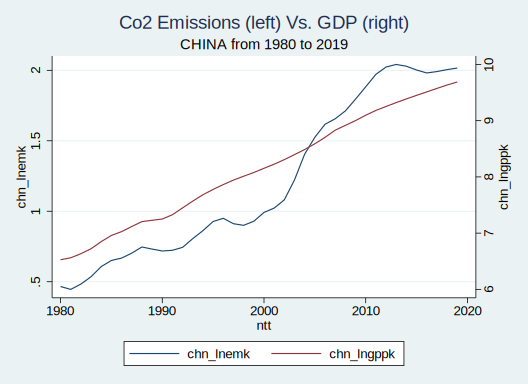

In [24]:
%%stata
twoway (tsline chn_lnemk) (tsline chn_lngppk, yaxis(2)), title(Co2 Emissions (left) Vs. GDP (right)) subtitle(CHINA from 1980 to 2019) 

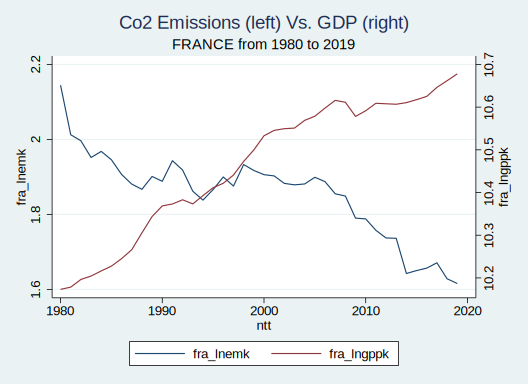

In [25]:
%%stata
twoway (tsline fra_lnemk) (tsline fra_lngppk, yaxis(2)), title(Co2 Emissions (left) Vs. GDP (right)) subtitle(FRANCE from 1980 to 2019) 


. 
. use emp_pcap8019.dta, clear

. 
. lorenz estimate v2_ , over( year ) graph(aspectratio(1) noci)

L(p)                                        Number of obs = 12

         1980: year = 1980
         2019: year = 2019

--------------------------------------------------------------
         v2_ | Coefficient  Std. err.     [95% conf. interval]
-------------+------------------------------------------------
1980         |
           0 |          0  (omitted)
           5 |   .0071799   .0175562      -.031461    .0458207
          10 |   .0143597   .0118277     -.0116729    .0403924
          15 |   .0215396    .007018      .0060931    .0369861
          20 |    .046161   .0754654     -.1199373    .2122592
          25 |   .0795032   .0625553     -.0581802    .2171865
          30 |   .1128454   .0608261     -.0210321    .2467228
          35 |   .1478983   .0725238     -.0117255    .3075221
          40 |   .1863728   .0704851      .0312362    .3415094
          45 |   .2248473   .0689

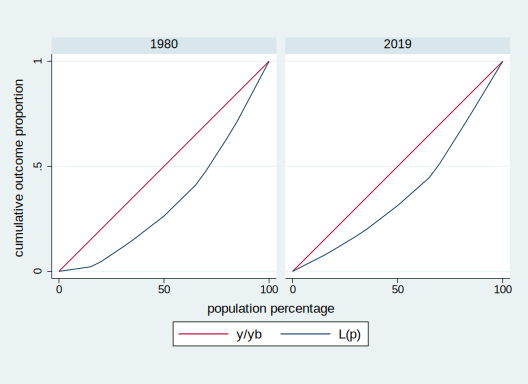

In [26]:
%%stata

use emp_pcap8019.dta, clear

lorenz estimate v2_ , over( year ) graph(aspectratio(1) noci)



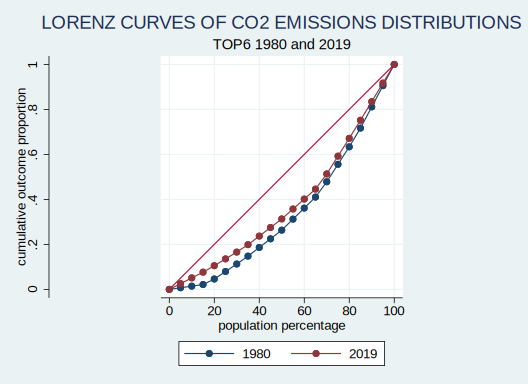

In [27]:
%%stata
lorenz graph, overlay aspectratio(1) noci xlabel(, grid) title(LORENZ CURVES OF CO2 EMISSIONS DISTRIBUTIONS) subtitle(TOP6 1980 and 2019) recast(connect)

In [28]:
%%stata
use logv_and_gini, clear

tsset ntt

generate lngini_emk6 = ln(gini_emk6)
newey  lngini_emk6 usa_lnkwk usa_lngppk can_lnkwk can_lngppk gbr_lnkwk gbr_lngppk jpn_lnkwk jpn_lngppk chn_lnkwk chn_lngppk fra_lnkwk fra_lngppk, noconstant lag(0)



. use logv_and_gini, clear

. 
. tsset ntt

Time variable: ntt, 1980 to 2019
        Delta: 1 year

. 
. generate lngini_emk6 = ln(gini_emk6)

. newey  lngini_emk6 usa_lnkwk usa_lngppk can_lnkwk can_lngppk gbr_lnkwk gbr_ln
> gppk jpn_lnkwk jpn_lngppk chn_lnkwk chn_lngppk fra_lnkwk fra_lngppk, noconsta
> nt lag(0)

Regression with Newey–West standard errors      Number of obs     =         40
Maximum lag = 0                                 F( 12,        28) =   12507.75
                                                Prob > F          =     0.0000

------------------------------------------------------------------------------
             |             Newey–West
 lngini_emk6 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   usa_lnkwk |   .6535829   .4615681     1.42   0.168    -.2918965    1.599062
  usa_lngppk |   .3412928   .5008746     0.68   0.501    -.6847024    1.367288
   can_lnkwk

In [29]:
df = pd.read_stata('logv_and_gini.dta')
df.describe


<bound method NDFrame.describe of     date        ntt  usa_lnpop  usa_lnemk  usa_lnkwk  usa_lngppk  gini_emk6  \
0   1980 1980-01-01  12.333229   3.041745   9.129327   10.347416    0.32184   
1   1981 1981-01-01  12.343293   3.006206   9.144093   10.362414    0.32687   
2   1982 1982-01-01  12.352804   2.945319   9.105922   10.334712    0.32628   
3   1983 1983-01-01  12.361926   2.931533   9.127252   10.370410    0.32106   
4   1984 1984-01-01  12.370675   2.973683   9.179305   10.431527    0.31330   
5   1985 1985-01-01  12.379525   2.963205   9.187019   10.463529    0.31235   
6   1986 1986-01-01  12.388694   2.956272   9.196936   10.488398    0.31288   
7   1987 1987-01-01  12.397664   2.981356   9.224654   10.513438    0.31917   
8   1988 1988-01-01  12.406751   3.017840   9.263554   10.545275    0.32328   
9   1989 1989-01-01  12.416193   3.025526   9.320732   10.571896    0.32124   
10  1990 1990-01-01  12.427281   3.005218   9.338773   10.579495    0.31119   
11  1991 1991-01-0

In [30]:
%%stata
resetxt lnemk_ lnkwk_ lngppk_ lngdppk2_ recess_ , model(xtfe) id(ID) it(year)

Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\adamh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Stata17/utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: variable lnemk_ not found
r(111);

